<a href="https://colab.research.google.com/github/niteshavagabond/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Nitesh_Verma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yes Bank Stock Closing Price Prediction


## Problem Statement

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

In [469]:
# importing libraries
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
# plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = (10,6)
import math
from sklearn import neighbors

from sklearn import model_selection
from sklearn.model_selection import KFold

from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters


In [470]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [471]:
# loading Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Yes Bank Stock Closing Price Prediction - Nitesh Verma/data_YesBank_StockPrices.csv') 

In [472]:
# looking at first 5 rows
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [473]:
# looking at last 5 rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [474]:
df.shape

(185, 5)

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [476]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [477]:
# looking column names, datatype of features, null values, unique values and their number of unique values
df_columns_table=[[name,df[name].dtypes,df[name].isnull().sum(),round(df[name].isnull().sum()/len(df)*100, 2),
                   df[name].nunique(),df[name].unique()] for name in df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,Date,object,0,0.0,185,"[Jul-05, Aug-05, Sep-05, Oct-05, Nov-05, Dec-0..."
1,Open,float64,0,0.0,183,"[13.0, 12.58, 13.48, 13.2, 13.35, 13.49, 13.68..."
2,High,float64,0,0.0,184,"[14.0, 14.88, 14.87, 14.47, 13.88, 14.44, 17.1..."
3,Low,float64,0,0.0,183,"[11.25, 12.55, 12.27, 12.4, 12.88, 13.0, 13.58..."
4,Close,float64,0,0.0,185,"[12.46, 13.42, 13.3, 12.99, 13.41, 13.71, 15.3..."


In [478]:
df['Date'] =df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y'))

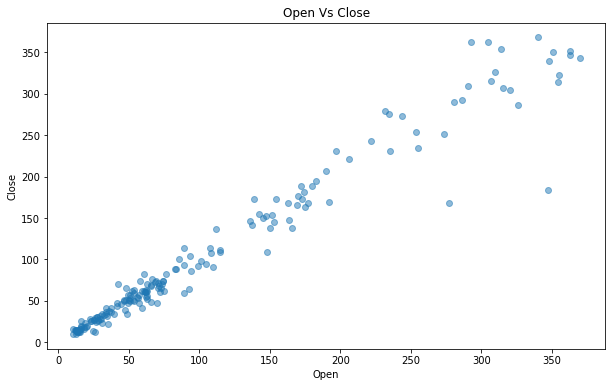

In [479]:
plt.scatter(df['Open'], df['Close'], alpha=0.5)
plt.title('Open Vs Close')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

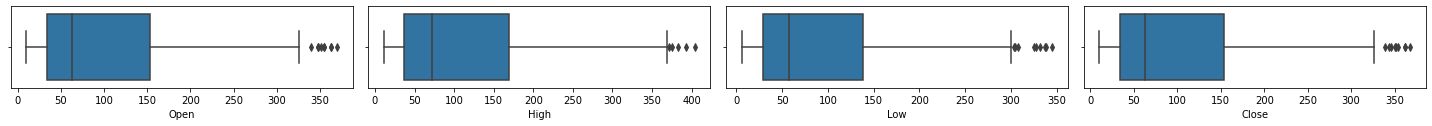

In [480]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

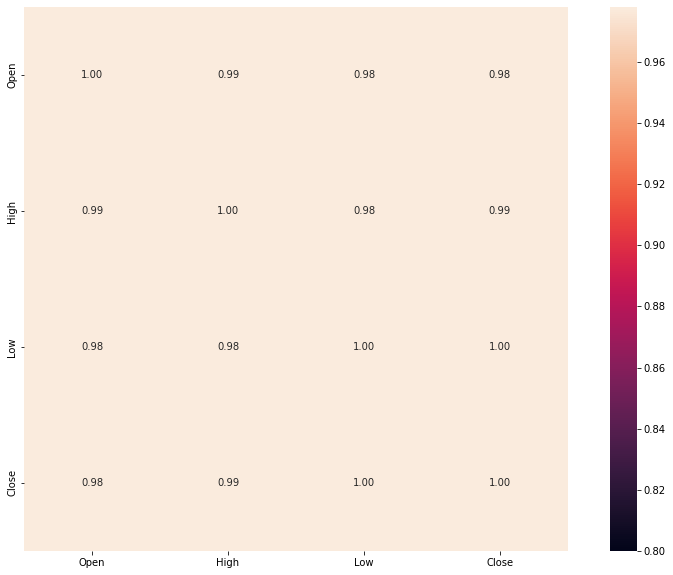

In [481]:
# ploting heat map finding correlation between columns
hdf = df.corr()

plt.subplots(figsize=(15, 10))
sns.heatmap(hdf,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

In [482]:
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

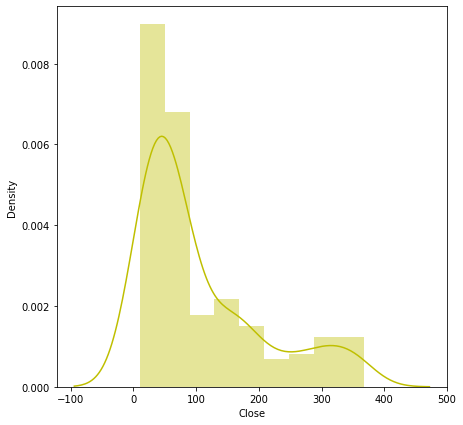

In [483]:
# Dependent variable 'Close'
plt.figure(figsize=(7,7))
sns.distplot(df['Close'],color="y")

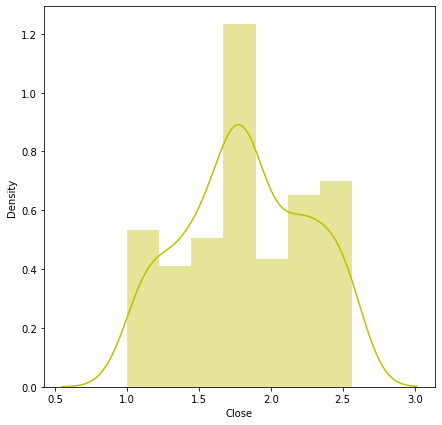

In [484]:
# Dependent variable 'Close'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Close']),color="y")

In [485]:
numeric_features = df.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

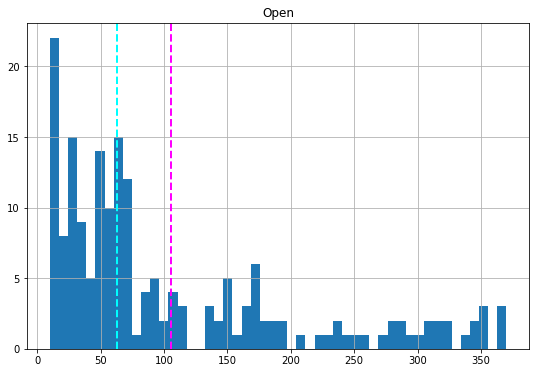

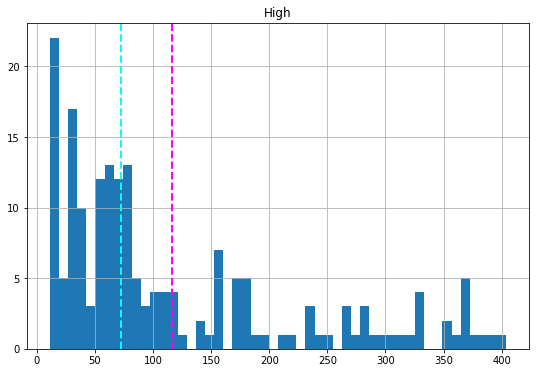

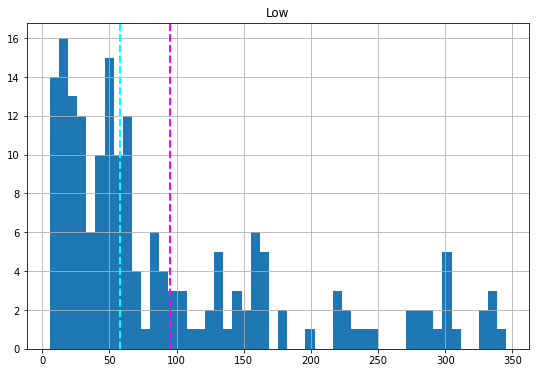

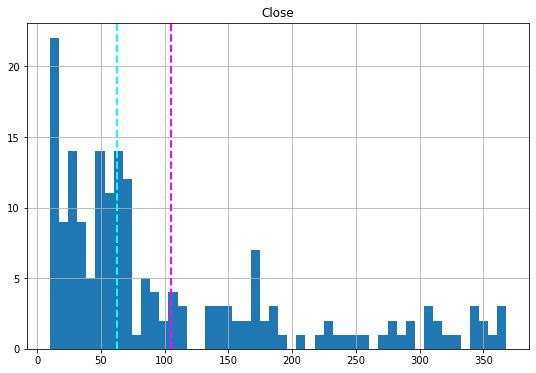

In [486]:
#@title Default title text
# plot a bar plot for each numerical feature count

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

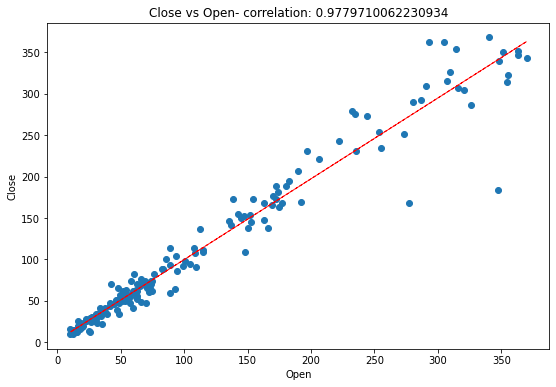

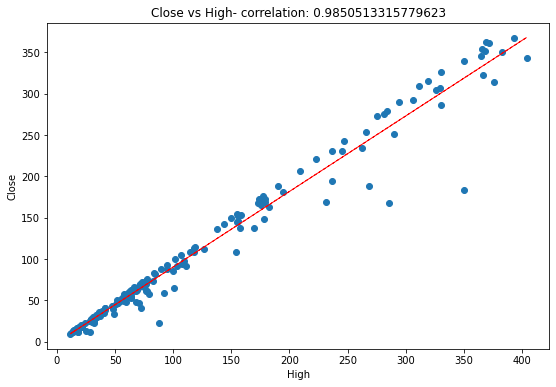

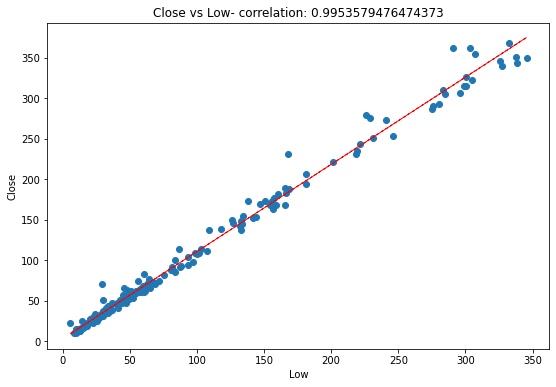

In [487]:
for col in numeric_features[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Close'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [489]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [491]:
df.set_index('Date', inplace= True)

In [492]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


# Functions

In [493]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [494]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evaluation Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(10**(y_test),10**(pred))
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(10**(y_test),10**(pred))
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(10**(y_test),10**(pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evaluation Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evaluation Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [495]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evaluation Matrix=========================\n')
    MSE  = mean_squared_error(10**(y_test),10**(preds))
    print("MSE :" , MSE)

    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    MAE_test = mean_absolute_error(10**(y_test), 10**(y_pred))
    print("MAE for test dataset:",MAE_test)
    
    MAPE_train = mean_absolute_percentage_error(10**(y_train), 10**(y_pred_train))
    print("MAPE for train dataset:",MAPE_train)
    
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(10**(y_test),10**(preds)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evaluation Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evaluation Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

In [496]:
def get_features_importance (optimal_model,X):
  '''
  shows the graph of feature importance
  '''
  features = X.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

# Lime

In [497]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [498]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  # vaariable to store feature names
  # X=df.drop(dependent_var,axis=1)
  # feature_names =list(X.columns)
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)

# Implementing Linear Regression

In [499]:
dependent_variable = 'Close'

In [500]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [501]:
X_column =df[independent_variables]

In [502]:
# Create the data of independent variables
X = X_column.values

# Create the dependent variable data
y = df[dependent_variable].values
y = np.log10(y)

In [503]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [504]:
X_train[0:10]

array([[142.08, 155.  , 134.  ],
       [ 16.2 ,  20.95,  16.02],
       [ 92.4 , 100.4 ,  57.71],
       [ 59.5 ,  72.55,  40.95],
       [ 10.04,  17.51,   9.94],
       [ 49.2 ,  78.94,  44.8 ],
       [ 47.8 ,  52.06,  47.3 ],
       [ 35.98,  41.04,  35.02],
       [ 49.99,  55.56,  30.24],
       [ 25.6 ,  28.3 ,  11.1 ]])

In [505]:
# Transforming data (scaling of data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [506]:
X_train[0:10]

array([[ 0.44371626,  0.44408203,  0.51369634],
       [-0.86243302, -0.85725057, -0.82417214],
       [-0.07177068, -0.08596467, -0.35141627],
       [-0.41314589, -0.35632732, -0.54147116],
       [-0.92635008, -0.89064545, -0.89311806],
       [-0.5200202 , -0.29429438, -0.49781297],
       [-0.5345468 , -0.55524044, -0.46946349],
       [-0.65719285, -0.66222056, -0.60871612],
       [-0.51182304, -0.52126309, -0.66292032],
       [-0.76489725, -0.78589813, -0.87996391]])

In [507]:
y_train

array([2.18912521, 1.30276371, 1.81130684, 1.61752453, 1.18892848,
       1.75966784, 1.70731463, 1.57898284, 1.70363524, 1.07736791,
       1.9330315 , 1.11892575, 1.53844805, 1.45682135, 2.51340407,
       1.86605092, 2.54955498, 1.4034637 , 1.67495295, 1.7363965 ,
       2.50819293, 1.08849047, 2.05648559, 1.52517443, 2.0581602 ,
       1.77451697, 2.53932706, 1.83142182, 1.98896007, 2.16411482,
       1.63828954, 1.96773513, 2.03494915, 2.17429246, 1.15745677,
       2.00121433, 1.84695533, 1.12385164, 1.73102438, 1.86934908,
       2.27584094, 1.01114736, 1.25599573, 2.0187421 , 1.7451529 ,
       1.42894429, 2.03622954, 2.24679392, 2.13618133, 1.68708284,
       2.54406804, 1.44638181, 1.61267792, 2.18132899, 1.96473092,
       1.78682238, 2.31468865, 1.17695898, 1.7854722 , 1.52439612,
       1.50419892, 1.81934648, 1.25139485, 2.46323583, 1.55606116,
       1.16643011, 2.13956427, 1.44932409, 1.35755372, 1.81947813,
       1.91750551, 1.70389295, 1.86770313, 1.73631681, 1.11360

In [508]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [509]:
# intercept
regressor.intercept_

1.799864714136271

In [510]:
# coefficent values
regressor.coef_

array([-0.12912861,  0.28145714,  0.22577234])

In [511]:
# Predicting train dataset
y_pred_train = regressor.predict(X_train)

In [512]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [513]:
#Predicted profit on the test data
y_pred

array([1.53271165, 1.96685151, 1.61036375, 1.95591371, 1.66701732,
       1.53307377, 2.32010906, 1.47235081, 1.46198661, 2.27176343,
       2.59774191, 1.77196865, 2.00437373, 1.63989847, 2.73572843,
       2.44737489, 1.69461712, 1.51604264, 2.45270911, 1.61168007,
       1.44552783, 1.87477595, 2.01565305, 1.63782509, 2.25504837,
       1.63485715, 2.42543822, 1.46033686, 1.83193344, 1.62300074,
       2.8808576 , 2.77557818, 1.6959313 , 2.07184242, 1.56166337,
       1.59651659, 2.42252489])

In [514]:
# Actual profits on test data
((y_test))

array([1.53224464, 2.16205634, 1.6716356 , 2.15253295, 1.79393001,
       1.47943134, 2.36410052, 1.20736504, 1.13703745, 2.2884728 ,
       2.48415742, 1.96047078, 2.18554215, 1.79504537, 2.53096768,
       2.43941165, 1.85648721, 1.42862067, 2.44575984, 1.69757803,
       0.99913054, 2.04805317, 2.17011497, 1.7707784 , 2.34498141,
       1.847881  , 2.39941411, 1.12742878, 2.0342674 , 1.72090317,
       2.53580029, 2.55866058, 1.88332068, 2.21301278, 1.61658053,
       1.67504474, 2.40401223])

In [515]:
# Evaluation metrics for train data

MSE_train  = mean_squared_error(10**(y_train), 10**(y_pred_train))
print("MSE for train dataset:" , MSE_train)

RMSE_train = np.sqrt(MSE_train)
print("RMSE for train dataset:" ,RMSE_train)

MAE_train = mean_absolute_error(10**(y_train), 10**(y_pred_train))
print("MAE for train dataset:",MAE_train)

MAPE_train = mean_absolute_percentage_error(10**(y_train), 10**(y_pred_train))
print("MAPE for train dataset:",MAPE_train)

r2_train = r2_score(10**(y_train), 10**(y_pred_train))
print("R-SQUARE for train dataset:",r2_train)

adjusted_r2_train = 1-((1-r2_train)*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 for train dataset: ",adjusted_r2_train)

MSE for train dataset: 5338.4680571774
RMSE for train dataset: 73.06482092756677
MAE for train dataset: 37.94622683195438
MAPE for train dataset: 0.4067659475358991
R-SQUARE for train dataset: 0.40917435385251044
Adjusted R2 for train dataset:  0.39686548622443774


In [516]:
# Evaluation metrics for test data

MSE_test  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE for test dataset:" , MSE_test)

RMSE_test = np.sqrt(MSE_test)
print("RMSE for test dataset:" ,RMSE_test)

MAE_test = mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE for test dataset:",MAE_test)

MAPE_test = mean_absolute_percentage_error(10**(y_test), 10**(y_pred))
print("MAPE for test dataset:",MAPE_test)

r2_test = r2_score(10**(y_test), 10**(y_pred))
print("R-SQUARE for test dataset:",r2_test)

adjusted_r2_test = 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 for test dataset: ",adjusted_r2_test)


MSE for test dataset: 8156.192042997316
RMSE for test dataset: 90.31163846923228
MAE for test dataset: 44.50182424513279
MAPE for test dataset: 0.3741058701115484
R-SQUARE for test dataset: 0.2753853320444376
Adjusted R2 for test dataset:  0.20951127132120473


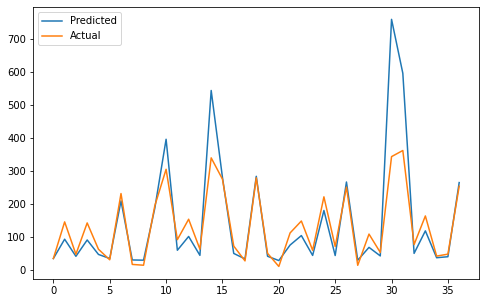

In [517]:
plt.figure(figsize=(8,5))
plt.plot(np.array(10**(y_pred)))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Linear Regresseion

In [518]:
#linear regression model

linear_model= LinearRegression()


================Evaluation Matrix=========================

MSE : 8156.192042997316
RMSE : 90.31163846923228
R2 : 0.2753853320444376
Adjusted R2 :  0.20951127132120473

================Evaluation Matrix=========================

  =========================================================  Evaluation Graph  ===================================================



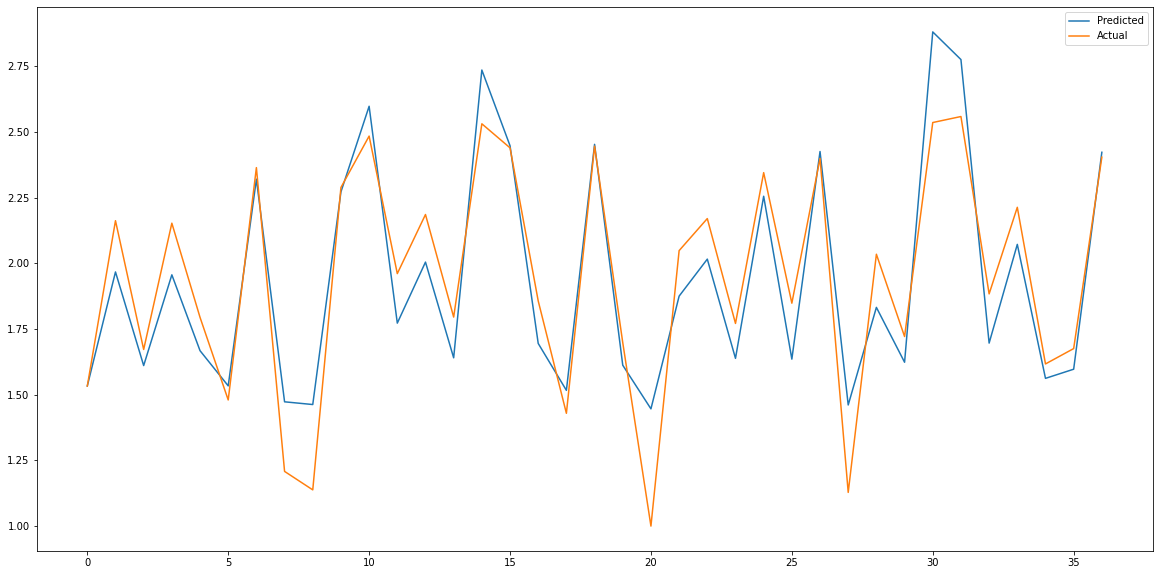

In [519]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

# Implementing Ridge (L2) regression

In [520]:
#Implementing ridge regression model
ridge= Ridge()

#Fitting the model
ridge.fit(X_train,y_train)

Ridge()

In [521]:
#Score 
ridge.score(X_train, y_train)

0.8081841639552242

In [522]:
#Prediction
y_pred_r = ridge.predict(X_test)

In [523]:
# Test performance
print("MSE :",mean_squared_error(10**(y_test), 10**(y_pred_r)))
print("RMSE :",math.sqrt(mean_squared_error(10**(y_test), 10**(y_pred_r))))
print("MAE :",mean_absolute_error(10**(y_test), 10**(y_pred_r)))
r2_test = metrics.r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :",r2_test)
adjusted_r2_test = 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 for test dataset: ", 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))


MSE : 7400.435687045446
RMSE : 86.02578501266609
MAE : 44.094839225746945
R2 : 0.3425284471202471
Adjusted R2 for test dataset:  0.2827583059493606


# Running Grid Search Cross Validation for Ridge Regression

In [524]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,8,6,19,20,21,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 8, 6, 19, 20, 21, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [525]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.035698769971189856


In [526]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [527]:
# Test performance
print("MSE :",mean_squared_error(10**(y_test), 10**(y_pred_ridge)))
print("RMSE :",math.sqrt(mean_squared_error(10**(y_test), 10**(y_pred_ridge))))
print("MAE :",mean_absolute_error(10**(y_test), 10**(y_pred_ridge)))

r2_test = metrics.r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :",r2_test)
adjusted_r2_test = 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 for test dataset: ", 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE : 7400.435687045446
RMSE : 86.02578501266609
MAE : 44.094839225746945
R2 : 0.3425284471202471
Adjusted R2 for test dataset:  0.2827583059493606


# Implementing Lasso regression


In [528]:
#Applying Lasso Regression model
lasso  = Lasso(alpha=0.010 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [529]:
#Fitting lasso model
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [530]:
# prediction for lasso model
y_pred_l = lasso.predict(X_test)

In [531]:
#performance metrics
print("MSE :",mean_squared_error(10**(y_test), 10**(y_pred_l)))
print("RMSE :",math.sqrt(mean_squared_error(10**(y_test), 10**(y_pred_l))))
print("MAE :",mean_absolute_error(10**(y_test), 10**(y_pred_l)))
r2_test = metrics.r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :",r2_test)
adjusted_r2_test = 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2: ", 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE : 5964.582235461886
RMSE : 77.23070785291227
MAE : 41.6578447826791
R2 : 0.47009293635335225
Adjusted R2:  0.4219195669309298


# Running Grid Search Cross Validation for Lasso Regression

In [532]:
from sklearn.model_selection import GridSearchCV
### let's use  Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.05,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.05, 1, 5, 10, 20, 30, 40,
                                   45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [533]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03556002002597104


In [534]:
#prediction
y_pred_lasso = lasso_regressor.predict(X_test)

In [535]:
# Test performance
print("MSE :",mean_squared_error(10**(y_test), 10**(y_pred_lasso)))
print("RMSE :",math.sqrt(mean_squared_error(10**(y_test), 10**(y_pred_lasso))))
print("MAE :",mean_absolute_error(10**(y_test), 10**(y_pred_lasso)))
r2_test = metrics.r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :",r2_test)
adjusted_r2_test = 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2: ", 1-((1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))


MSE : 5964.582235461886
RMSE : 77.23070785291227
MAE : 41.6578447826791
R2 : 0.47009293635335225
Adjusted R2:  0.4219195669309298


# Implementing Elastic net Regression

In [536]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [537]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [538]:
elasticnet.score(X_train, y_train)

0.7880835895563086

In [539]:
y_pred_en = elasticnet.predict(X_test)

In [540]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2247.6492806732263
RMSE : 47.4093796697787
R2 : 0.800313721328579
Adjusted R2 :  0.7821604232675408


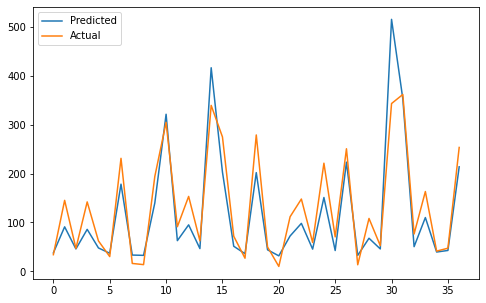

In [541]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_en))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Running Grid Search Cross Validation for ELastic Net Regression

In [542]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=10)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [543]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [544]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.6}

Using  {'alpha': 0.01, 'l1_ratio': 0.6}  the negative mean squared error is:  -0.03553354642206501


In [545]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 6458.092676750428
RMSE : 80.36225903215033
R2 : 0.42624834531605205
Adjusted R2 :  0.3740891039811477


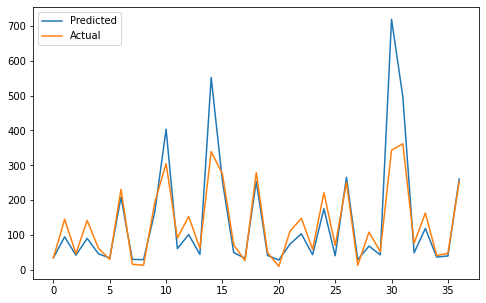

In [546]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

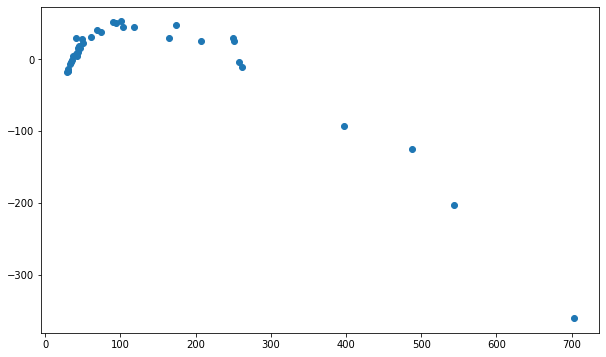

In [547]:
### Heteroscadacity
plt.scatter(10**(y_pred_lasso),10**(y_test)-10**(y_pred_lasso))

In [548]:
10**(y_pred_lasso)

array([ 34.93393527,  94.60920993,  42.43155938,  90.29814156,
        46.39797644,  34.44624086, 206.81328661,  30.38903665,
        29.72610785, 164.93553824, 397.47386703,  61.1406024 ,
       101.14348281,  44.46036524, 542.98411224, 250.56869466,
        50.00286776,  33.36319799, 250.14724151,  41.6370337 ,
        28.63757818,  74.22212392, 103.03381846,  43.64446622,
       174.09946627,  40.86774013, 262.18741825,  29.6448361 ,
        68.3874246 ,  43.24815815, 703.37976969, 487.35385419,
        49.34817142, 118.36744225,  37.01429374,  40.30573478,
       257.95514284])

In [549]:
10**(y_test)

array([ 34.06, 145.23,  46.95, 142.08,  62.22,  30.16, 231.26,  16.12,
        13.71, 194.3 , 304.9 ,  91.3 , 153.3 ,  62.38, 339.6 , 275.05,
        71.86,  26.83, 279.1 ,  49.84,   9.98, 111.7 , 147.95,  58.99,
       221.3 ,  70.45, 250.85,  13.41, 108.21,  52.59, 343.4 , 361.96,
        76.44, 163.31,  41.36,  47.32, 253.52])

# Polynomial Regression

In [550]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [551]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evaluation Matrix=========================

MSE : 2614.5654720218126
RMSE : 51.13282186640801
R2 : 0.7677160516366488
Adjusted R2 :  0.7465993290581623

================Evaluation Matrix=========================

  =========================================================  Evaluation Graph  ===================================================



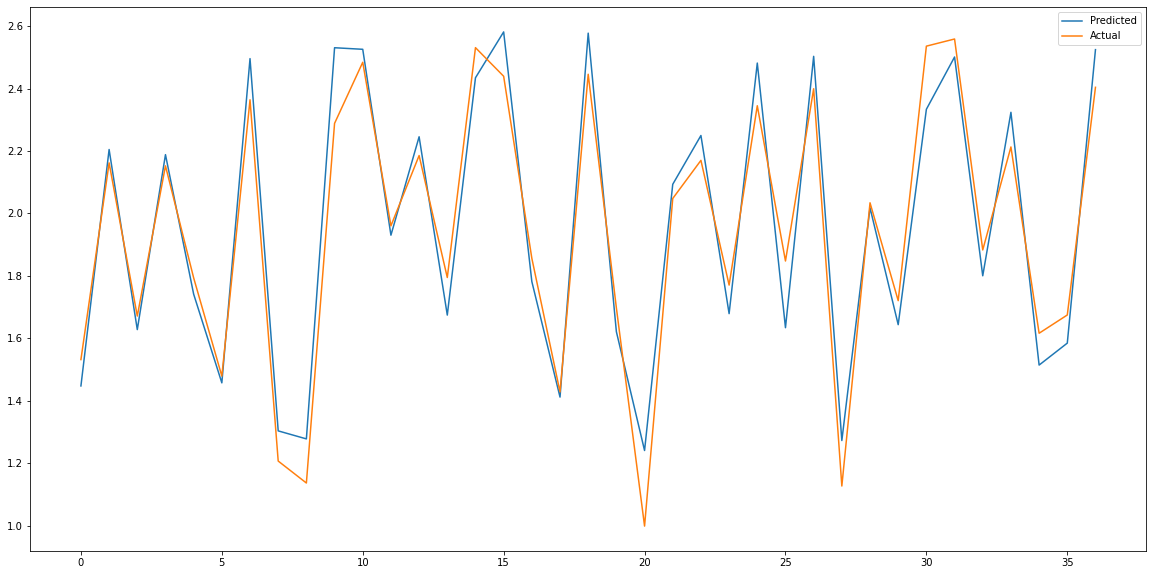

In [552]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

# Decision Tree Regression

In [553]:
from sklearn.tree import DecisionTreeRegressor


================Evaluation Matrix=========================

MSE : 280.147664864866
RMSE : 16.737612280874053
MAE for test dataset: 44.50182424513279
MAPE for train dataset: 0.4067659475358991
R2 : 0.9841356608059514
Adjusted R2 :  0.9728484113328971

================Evaluation Matrix=========================

    =========================================================    Evaluation Graph    ===================================================



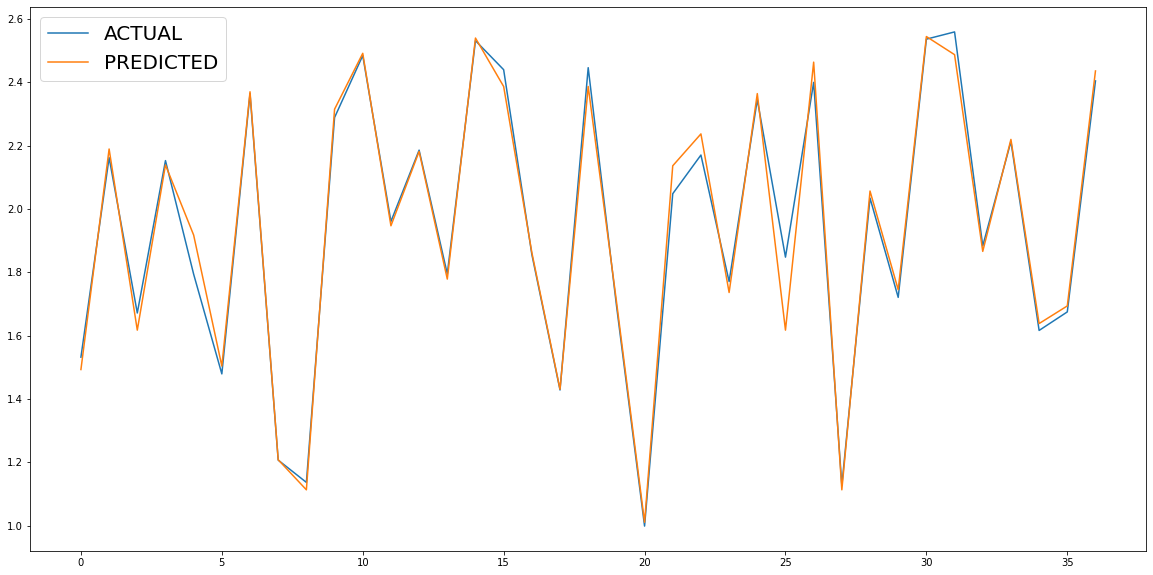

In [554]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

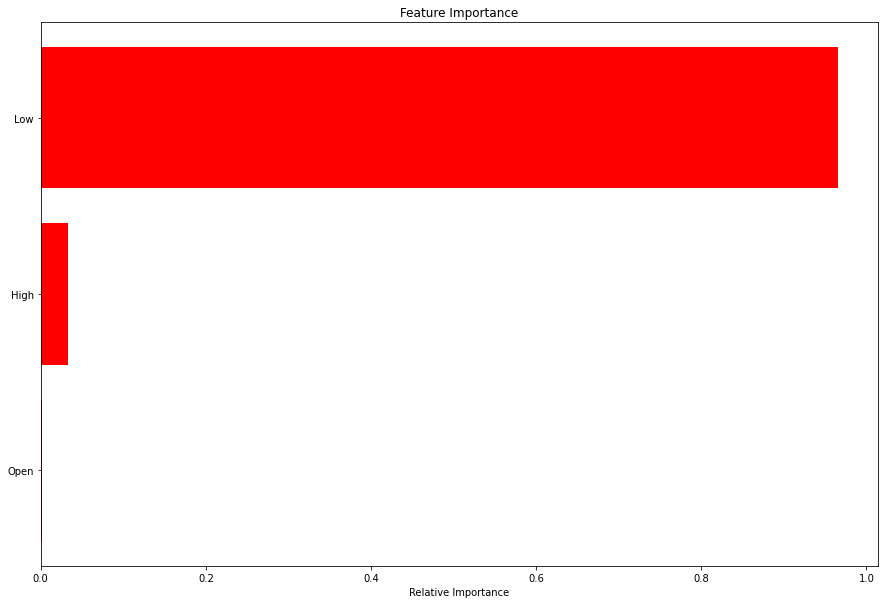

In [555]:
#getting features importance of decision tree
get_features_importance(dt_model,X_column)

# Random Forest

In [556]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [557]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [558]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [559]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evaluation Matrix=========================

MSE : 144.89216249621876
RMSE : 12.037116037332977
MAE for test dataset: 44.50182424513279
MAPE for train dataset: 0.4067659475358991
R2 : 0.9873141947398095
Adjusted R2 :  0.9859572186722241

================Evaluation Matrix=========================

    =========================================================    Evaluation Graph    ===================================================



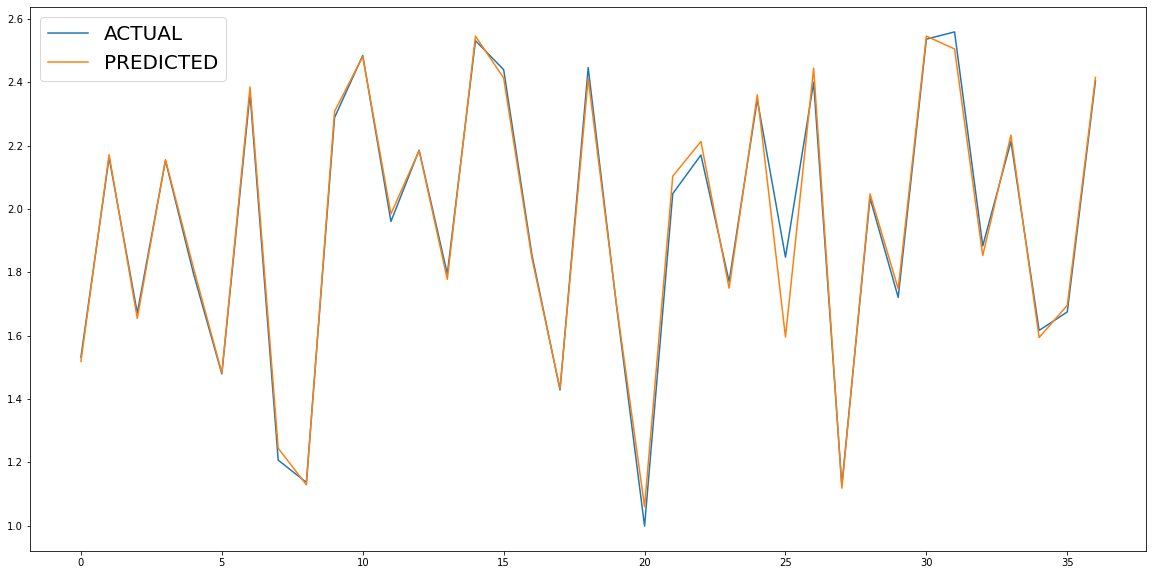

In [560]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [561]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

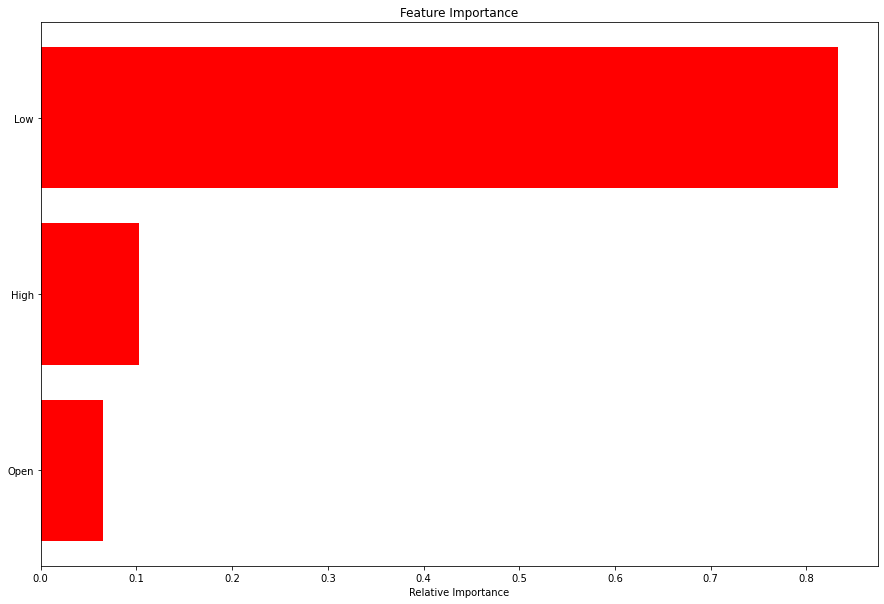

In [562]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_column)

# Gradient Boosting

In [563]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [564]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [565]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [566]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


================Evaluation Matrix=========================

MSE : 198.7807618488038
RMSE : 14.098963148005026
MAE for test dataset: 44.50182424513279
MAPE for train dataset: 0.4067659475358991
R2 : 0.9860928885914488
Adjusted R2 :  0.9807343977567847

================Evaluation Matrix=========================

    =========================================================    Evaluation Graph    ===================================================



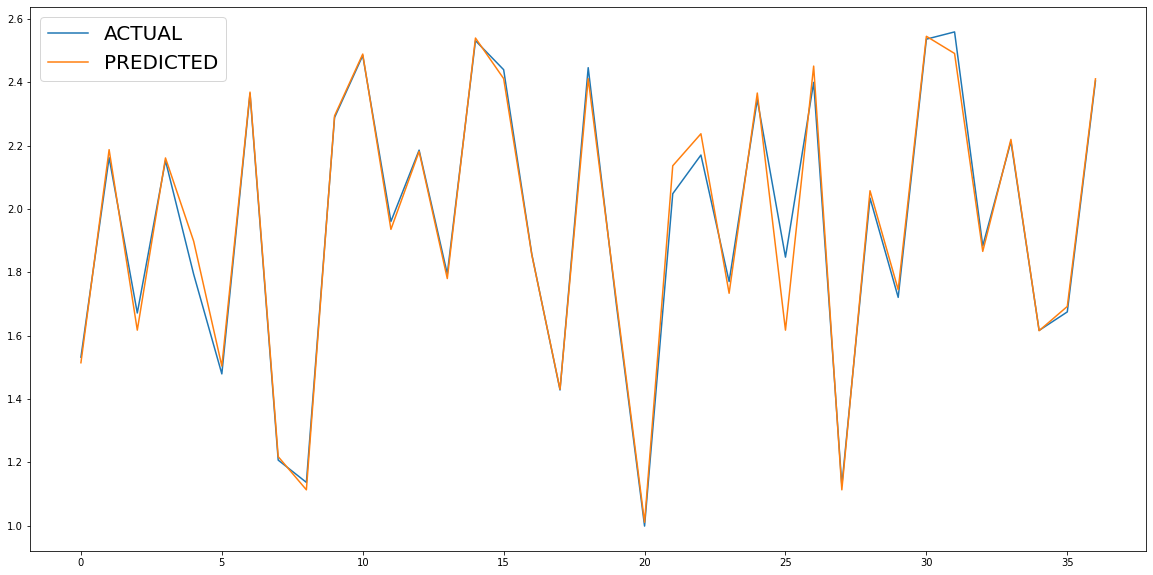

In [567]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [568]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

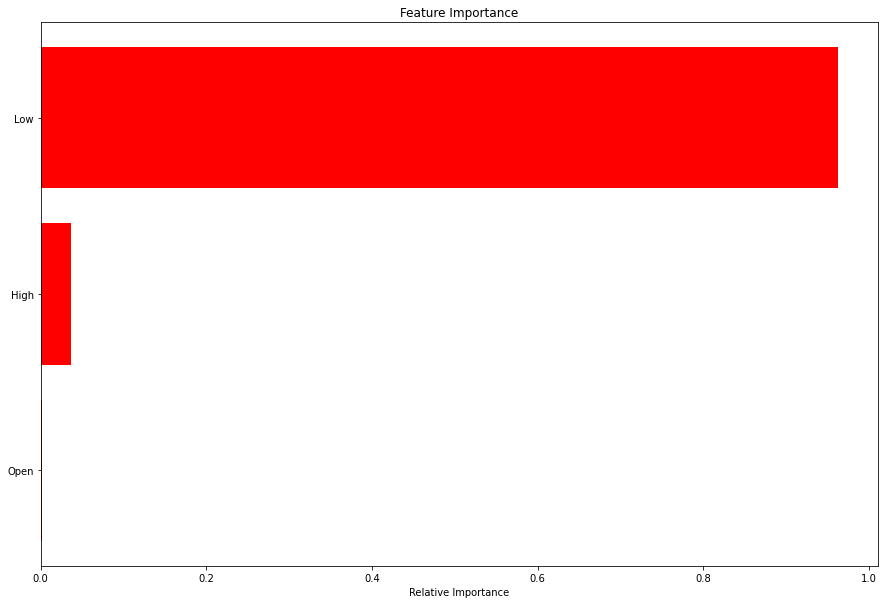

In [569]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_column)

# eXtreme Gradient Boosting

In [570]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [571]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [572]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [573]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

[04:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

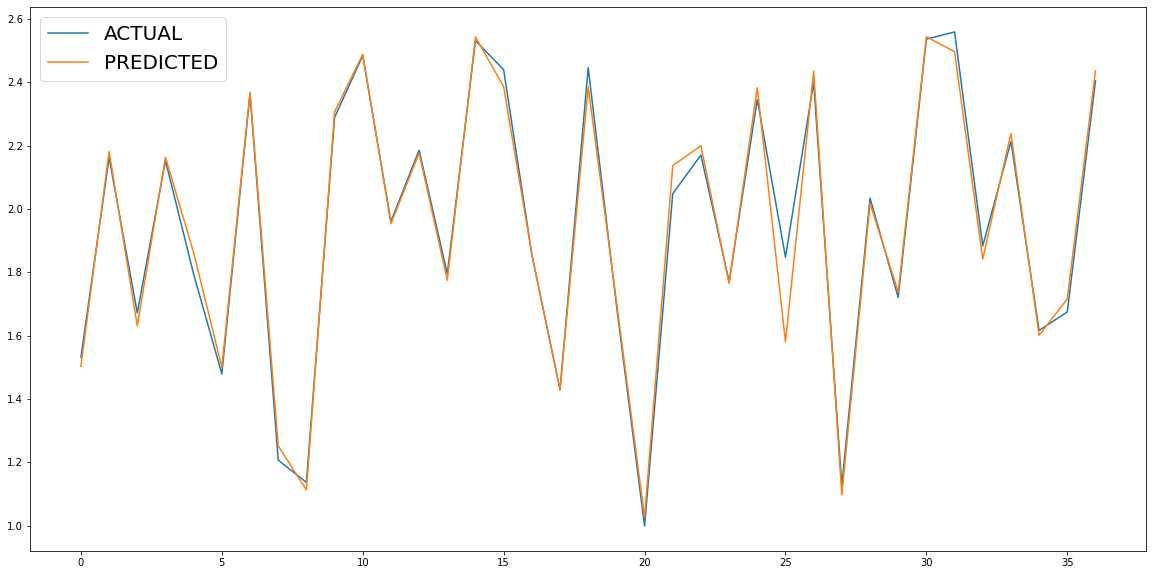

In [577]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [576]:
#getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

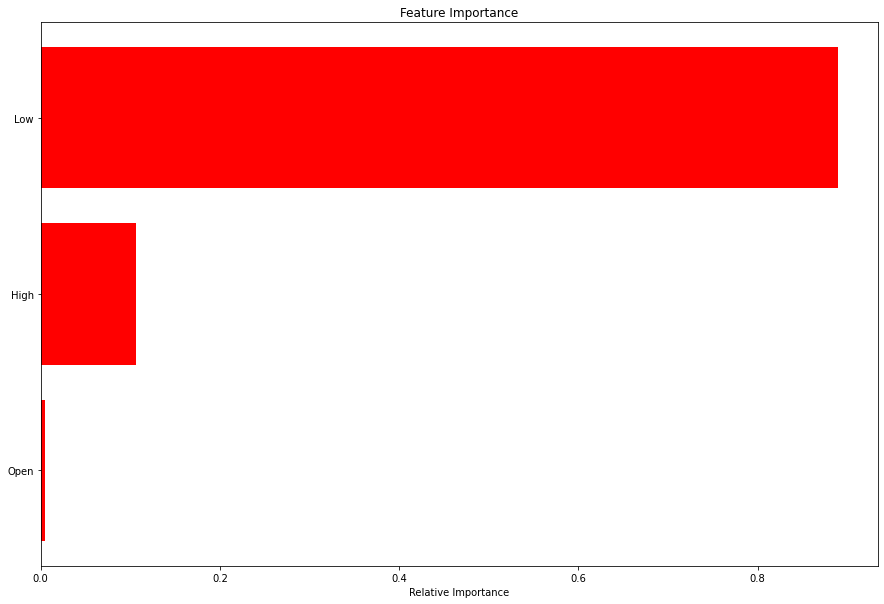

In [579]:
#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X_column)

# CatBoost

In [580]:
#installing catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [581]:
#importing cat boost Regressor
from catboost import CatBoostRegressor

In [582]:
# creating Catboost model
cb_model=CatBoostRegressor(verbose=0)


================Evaluation Matrix=========================

MSE : 122.7807950037405
RMSE : 11.080649574990652
MAE for test dataset: 44.50182424513279
MAPE for train dataset: 0.4067659475358991
R2 : 0.9919007994753318
Adjusted R2 :  0.9881002269150824

================Evaluation Matrix=========================

    =========================================================    Evaluation Graph    ===================================================



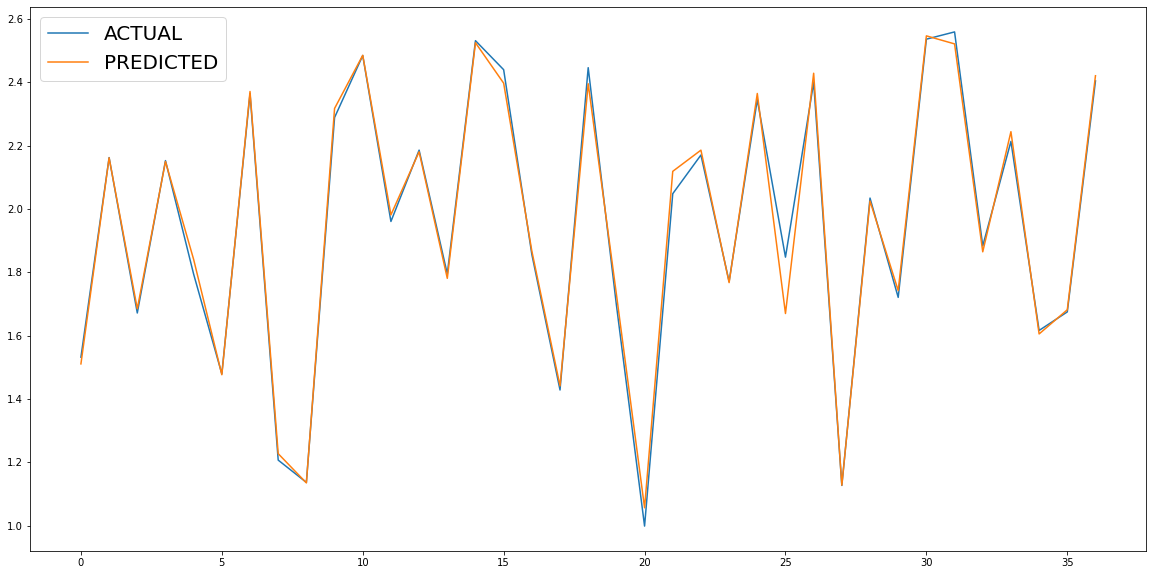

In [583]:
#calling run_model to train,fit and evalution of catboost model
run_model(cb_model,X_train,y_train,X_test,y_test)

In [584]:
#checking params of cat boost model
cb_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.030275000259280205,
 'score_function': 'Cosine',
 'task_type

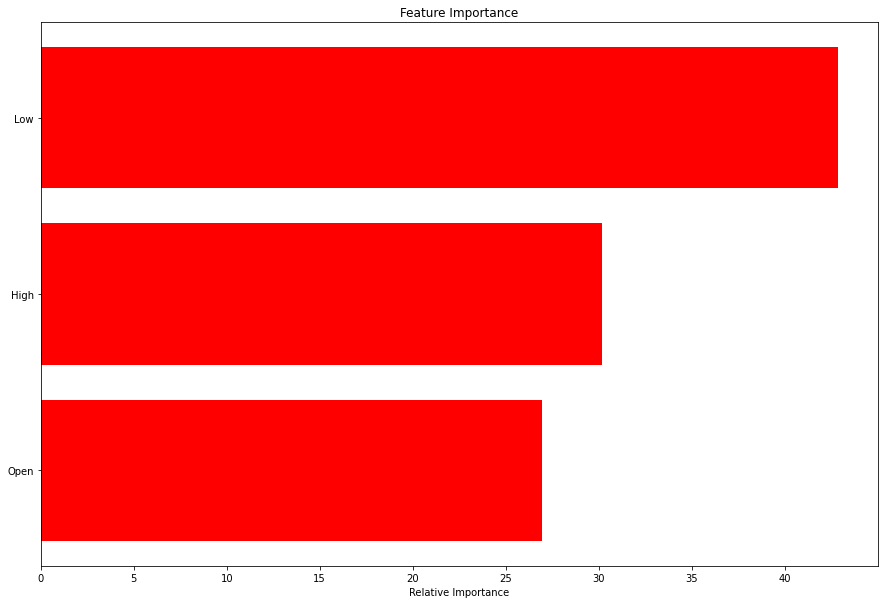

In [585]:
#getting and visualizing features importance of catboost model
get_features_importance(cb_model,X_column)

# lightGBM

In [586]:
import lightgbm as lgb

In [587]:
lgbr=lgb.LGBMRegressor()

In [588]:
#finding the best parameters for XGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

================Evaluation Matrix=========================

MSE : 634.694967450295
RMSE : 25.193153185941117
MAE for test dataset: 44.50182424513279
MAPE for train dataset: 0.4067659475358991
R2 : 0.9796628101982231
Adjusted R2 :  0.938486095561056

================Evaluation Matrix=========================

    =========================================================    Evaluation Graph    ===================================================



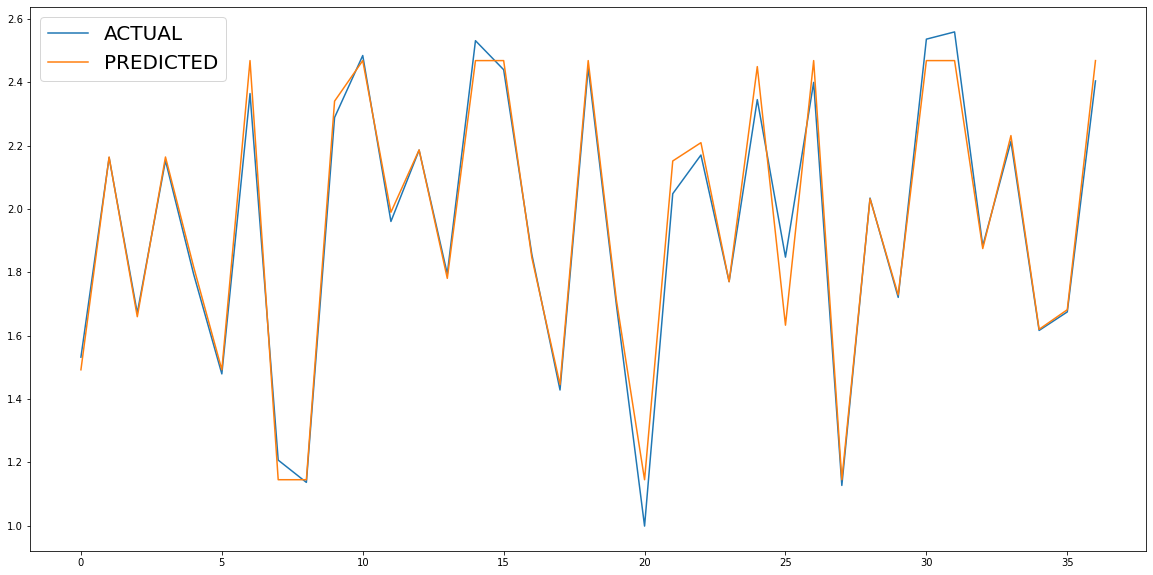

In [589]:
#calling run_model to train,fit and evalution of catboost model
run_model(lgbr_grid,X_train,y_train,X_test,y_test)

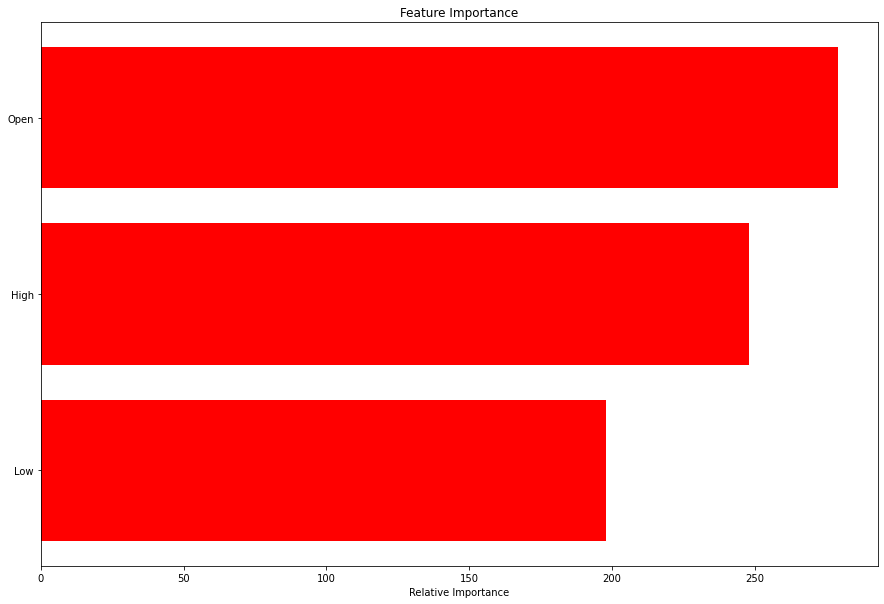

In [590]:
#getting and visualizing features importance of catboost model
get_features_importance(lgbr_grid.best_estimator_,X_column)

# Combined Evaluation Matrix of All the models

In [591]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}